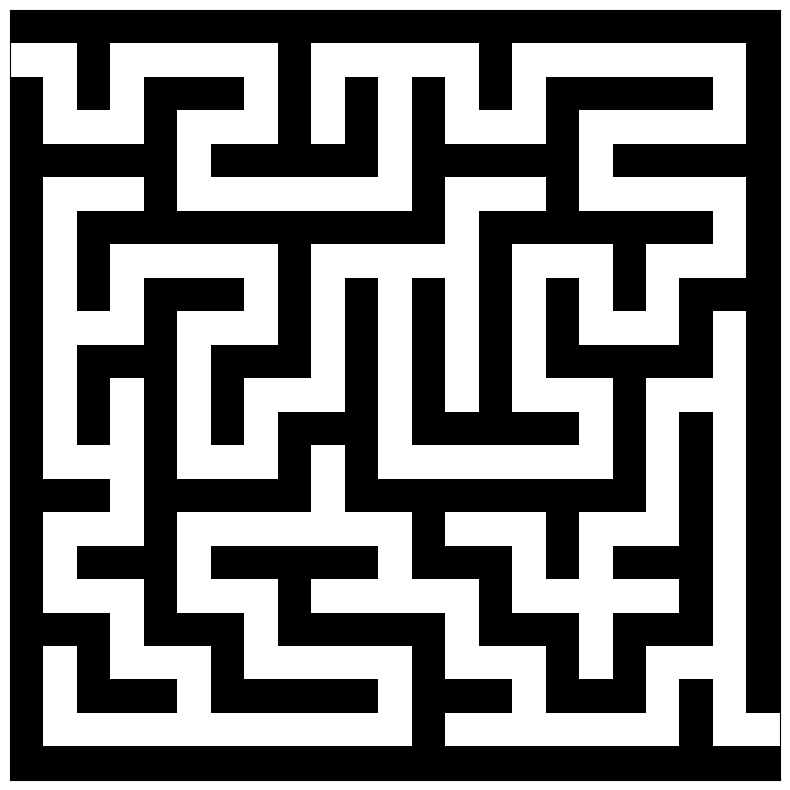

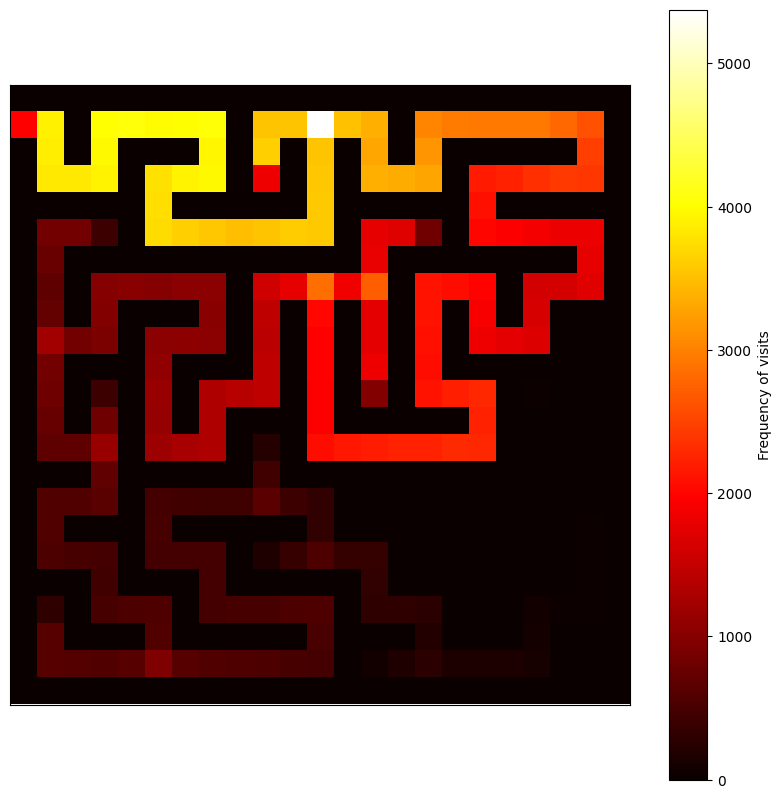

In [73]:
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

class Maze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.ones((height, width), dtype=int)  # Walls are 1, paths are 0
        self.generate_maze()

    def generate_maze(self):
        # maze generation with a recursive backtracking algorithm
        self._recursive_backtracker(1, 1)
        # Ensure start and end points
        self.grid[1, 0] = 0  # Entry
        self.grid[self.height - 2, self.width - 1] = 0  # Exit

    def _recursive_backtracker(self, x, y):
        self.grid[y, x] = 0  # Mark the current cell as a path
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = x + dx * 2, y + dy * 2
            if 1 <= nx < self.width - 1 and 1 <= ny < self.height - 1 and self.grid[ny, nx] == 1:
                self.grid[ny - dy, nx - dx] = 0  # Knock down the wall
                self._recursive_backtracker(nx, ny)

    def display(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.grid, cmap='binary')
        plt.xticks([]), plt.yticks([])
        plt.show()

class QuantumWalk2D:
    def __init__(self, maze):
        self.maze = maze
        self.state = np.zeros((maze.height, maze.width))
        self.position = (1, 0)
        self.state[1, 0] = 1

    def step(self):
        x, y = self.position
        if (x, y) == (self.maze.width - 2, self.maze.height - 2):
            return False  # Exit reached

        directions = []
        if x + 1 < self.maze.width and self.maze.grid[y, x + 1] == 0:
            directions.append((1, 0))
        if x - 1 >= 0 and self.maze.grid[y, x - 1] == 0:
            directions.append((-1, 0))
        if y + 1 < self.maze.height and self.maze.grid[y + 1, x] == 0:
            directions.append((0, 1))
        if y - 1 >= 0 and self.maze.grid[y - 1, x] == 0:
            directions.append((0, -1))

        if directions:
            dx, dy = random.choice(directions)
            nx, ny = x + dx, y + dy
            self.state[ny, nx] += 1
            self.position = (nx, ny)

        return True

    def random_walk(self):
        while self.step():
            pass

    def solve_maze(self):
        # Perform multiple random walks
        for _ in range(10):  # Increase this number for better frequency visualization
            self.position = (1, 0)  # Reset position to the start
            self.random_walk()  # Perform a random walk until the exit is reached

    def display(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.state, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Frequency of visits')
        plt.xticks([]), plt.yticks([])  # Remove ticks
        plt.show()

# Create a maze and a quantum walk instance
maze = Maze(23, 23)
maze.display()

quantum_walk = QuantumWalk2D(maze)
quantum_walk.solve_maze()
quantum_walk.display()


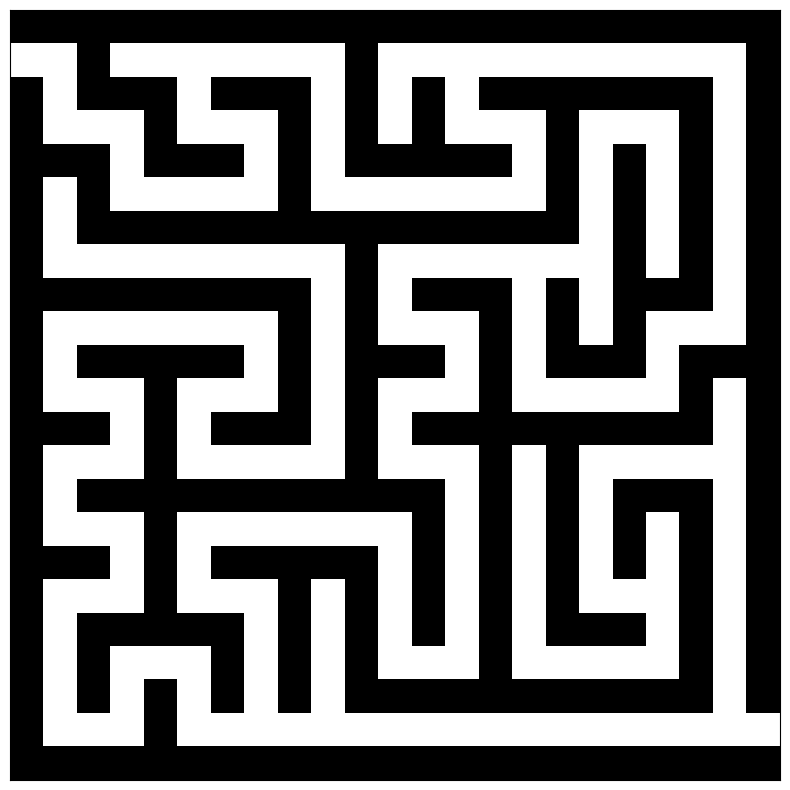

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/riley/Library/Python/3.11/lib/python/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/cx/1j72vd_j5rz1brwvqzx2cc6m0000gn/T/ipykernel_28857/3037134194.py", line 107, in <module>
    quantum_walk.solve_maze()
  File "/var/folders/cx/1j72vd_j5rz1brwvqzx2cc6m0000gn/T/ipykernel_28857/3037134194.py", line 93, in solve_maze
    self.random_walk()  # Perform a random walk until the exit is reached
    ^^^^^^^^^^^^^^^^^^
  File "/var/folders/cx/1j72vd_j5rz1brwvqzx2cc6m0000gn/T/ipykernel_28857/3037134194.py", line 86, in random_walk
    while self.step():
          ^^^^^^^^^^^
  File "/var/folders/cx/1j72vd_j5rz1brwvqzx2cc6m0000gn/T/ipykernel_28857/3037134194.py", line 62, in step
    direction = self.quantum_choice(directions)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/var/folders/cx/1j72vd_j5rz1brwvqzx2cc6m0000gn/T/ipykernel_28857/3037

In [79]:
import numpy as np
import random
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

class Maze:
    def __init__(self, width, height):
        self.width = width
        self.height = height
        self.grid = np.ones((height, width), dtype=int)  # Walls are 1, paths are 0
        self.generate_maze()

    def generate_maze(self):
        # maze generation with a recursive backtracking algorithm
        self._recursive_backtracker(1, 1)
        # Ensure start and end points
        self.grid[1, 0] = 0  # Entry
        self.grid[self.height - 2, self.width - 1] = 0  # Exit

    def _recursive_backtracker(self, x, y):
        self.grid[y, x] = 0  # Mark the current cell as a path
        directions = [(0, 1), (1, 0), (0, -1), (-1, 0)]
        random.shuffle(directions)
        for dx, dy in directions:
            nx, ny = x + dx * 2, y + dy * 2
            if 1 <= nx < self.width - 1 and 1 <= ny < self.height - 1 and self.grid[ny, nx] == 1:
                self.grid[ny - dy, nx - dx] = 0  # Knock down the wall
                self._recursive_backtracker(nx, ny)

    def display(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.grid, cmap='binary')
        plt.xticks([]), plt.yticks([])
        plt.show()

class QuantumWalk2D:
    def __init__(self, maze):
        self.maze = maze
        self.state = np.zeros((maze.height, maze.width))
        self.position = (1, 0)
        self.state[1, 0] = 1
        self.backend = AerSimulator()

    def step(self):
        x, y = self.position
        if (x, y) == (self.maze.width - 2, self.maze.height - 2):
            return False  # Exit reached

        directions = []
        if x + 1 < self.maze.width and self.maze.grid[y, x + 1] == 0:
            directions.append((1, 0))
        if x - 1 >= 0 and self.maze.grid[y, x - 1] == 0:
            directions.append((-1, 0))
        if y + 1 < self.maze.height and self.maze.grid[y + 1, x] == 0:
            directions.append((0, 1))
        if y - 1 >= 0 and self.maze.grid[y - 1, x] == 0:
            directions.append((0, -1))

        if directions:
            direction = self.quantum_choice(directions)
            dx, dy = direction
            nx, ny = x + dx, y + dy
            self.state[ny, nx] += 1
            self.position = (nx, ny)

        return True

    def quantum_choice(self, directions):
        num_directions = len(directions)
        qc = QuantumCircuit(num_directions, num_directions)
        for i in range(num_directions):
            qc.h(i)  # Apply Hadamard gate to create superposition
        qc.measure(range(num_directions), range(num_directions))

        transpiled_qc = transpile(qc, self.backend)
        result = self.backend.run(transpiled_qc).result()
        counts = result.get_counts()

        max_key = max(counts, key=counts.get)
        choice = int(max_key, 2) % num_directions
        return directions[choice]

    def random_walk(self):
        while self.step():
            pass

    def solve_maze(self):
        # Perform multiple random walks
        for _ in range(10):  # Increase this number for better frequency visualization
            self.position = (1, 0)  # Reset position to the start
            self.random_walk()  # Perform a random walk until the exit is reached

    def display(self):
        plt.figure(figsize=(10, 10))
        plt.imshow(self.state, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Frequency of visits')
        plt.xticks([]), plt.yticks([])  # Remove ticks
        plt.show()

# Create a maze and a quantum walk instance
maze = Maze(23, 23)
maze.display()

quantum_walk = QuantumWalk2D(maze)
quantum_walk.solve_maze()
quantum_walk.display()
